# **Data Mining Assignment - 1**
---

### **Name        :**             Soubhik Sen  
### **Roll No     :**          24MA4108  
### **Dept        :**             MTech in Operation Research  
### **Subject Code:**     CS9030  
### **Subject Name:**     Data Mining  
### **Professor   :**        Dr. Monalisa Mandal  
### **Date of Submission :** Oct 13, 2024  

---

### GitHub Repository

#### [CS9030 Assignment-1](https://github.com/sensoubhik11/CS9030-assignment1)

---

### Problem Statement
*Implement the following algorithms on the Iris dataset using Python/R language.*
-  K-means algorithm: This has to be done ourselves without using libraries. Also provide visualization of the output as a Cluster plot.
-  DBSCAN algorithm (density-based clustering): This can be done using Python/R packages. Also provide visualization of the output as a Cluster plot.
-  Agglomerative Hierarchical clustering algorithm: This can be done using Python/R packages. For output, only a dendrogram (as a tree structure) is sufficient (suitable package available).

# Implementing K-Means Algorithm without any external packages/libraries
As per the requirements of the given assignment problems, no external packages will be used to implement kmeans algorithm. Only simple Python lists and classes will be used to store and manipulate the data.

### My Approach
- There will be a `Datapoint` class whose attribute `dims` will store the coordinates of the datapoint in a list. There will be essential class methods like adding two `Datapoints`, finding squared euclidean distance between two, etc. while will be useful in our later operations.
- After loading data, we will have a list `data` of `Datapoint` objects from iris.data file. 
- Random `k` `Datapoints` will be selected as centroids and stored in `centroids` list which is nothing but a list of `Datapoint` objects.
- The squared euclidean distances will be calculated on the go and eventually the `Datapoint` will be assigned a cluster with the help of cluster tags, i.e., the assignment will be stored in a separate list called Cluster Tags.
- The cluster tag is a list where the indices will correspond to the indices of `Datapoint` in `data` list and the values will correspond to the indices of a particular centroid in `centroids` list.
- Eventually, the centroids will be updated by performing addition and division by some scalar quantity on `Datapoints` and we will check whether they match with the old ones.
- If they match, the algorithm stops. Else the iterations continue.
- Then we will find the optimal value of `k` by elbow method by running kmeans from `k = 2` to `k = 10` and finding the WCSS and plotting it on a graph.
- After that, we will run kmeans with optimal value of `k`, record the centroids and cluster assignments.
- Then we shall produce the output both in text form and nice 3D scatter plot.

## Step 1: Creating a `Datapoint` class
- Since every datapoint can have multiple features(coordinates or dimensions), we will create a dedicated `Datapoint` class for the data points for easy handling of data.
- The attribute of `Datapoint` class, `dims`, is a list of coordinates(or features) of a single data point.
- Other class methods are created to calculate the squared euclidian distance between two points, adding two points, dividing the point by some scalar quantity as these operations are often required in K-Means Algorithm.

In [89]:
from typing import List

class Datapoint:
    def __init__(self, dims: List[float]):
        self.dims = dims
    
    def __repr__(self):
        return f"Pt{self.dims}"

    def dis(self, other):
        dis = 0.0
        for i in range(len(self.dims)):
            dis += (self.dims[i] - other.dims[i])**2  # squared euclidean distance
        return dis

    def __add__(self, other):
        """
        Will be used during updation of centroids in finding the average of all points
        """
        new_dims = []
        for i in range(len(self.dims)):
            new_dims.append(self.dims[i] + other.dims[i])
        return Datapoint(new_dims)

    def __truediv__(self, scalar: int):
        """
        Will be used during updation of centroids in finding the average of all points
        """
        new_dims = []
        for i in range(len(self.dims)):
            new_dims.append(self.dims[i] / scalar)
        return Datapoint(new_dims)
        
    def __eq__(self, other):
        return self.dims == other.dims

## Step 2: Loading the dataset
- We will load our data from a csv file where each row is an individual data point
- So eventually, we will have a list of `Datapoint` objects

In [90]:
import csv

def load_data(FILE_PATH: str):
    data = []
    with open(FILE_PATH, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if row: # making sure row is not empty
                data.append(Datapoint([float(val) for val in row[:-1]]))
    return data
print(load_data("iris/iris.data")[:7]) # Printing a few datapoints from data

[Pt[5.1, 3.5, 1.4, 0.2], Pt[4.9, 3.0, 1.4, 0.2], Pt[4.7, 3.2, 1.3, 0.2], Pt[4.6, 3.1, 1.5, 0.2], Pt[5.0, 3.6, 1.4, 0.2], Pt[5.4, 3.9, 1.7, 0.4], Pt[4.6, 3.4, 1.4, 0.3]]


As you can see, we have now successfully loaded our data in `data` list.

## Step 3: Implementing K-Means Algorithm

In [91]:
def kmeans(data: List[Datapoint], k: int):
    import random
    # Randomly initialize the centroids
    centroids: List[Datapoint] = random.sample(data, k)

    # This list will contains the assignment(tags) of every Datapoint to which cluster it belongs
    # the cluster number will be nothing but the index of the centroid(of that cluster) in the centroids list
    cluster_tags = [None]*len(data)

    # iteration begins and will continue until we get equal centroids
    while True:
        for i in range(len(data)):
            pt = data[i]
            min_dis = float('inf')
    
            #calculating distance of pt with every centroid and eventually finding the closest one
            for j in range(len(centroids)):
                dis = pt.dis(centroids[j])
                if dis < min_dis:
                    min_dis = dis
                    cluster_tags[i] = j
    
        # updating the centroids after assigning cluster tag to each Datapoint
        # creating a new list of centroids with all datapoints having dims initially 0
        new_centroids: List[Datapoint] = [Datapoint([0]*len(data[0].dims)) for _ in range(k)]
        counts = [0]*k # to store count of Datapoints in each cluster
    
        for i in range(len(data)):
            tag = cluster_tags[i]
            new_centroids[tag] = new_centroids[tag] + data[i] # adding the datapoints together to eventually find the average
            counts[tag] += 1
        for i in range(len(new_centroids)):
            if counts[i] > 0:
                new_centroids[i] = new_centroids[i] / counts[i]
        if new_centroids == centroids:
            break
        else:
            centroids = new_centroids
            
    return centroids, cluster_tags, counts
    

## Step 4: Finding optimal value of k
- We shall first calculate the within cluster sum of squares for clusters for every k
- Then we will plot the wcss for every k from 2 to 10
- We shall plot the data using the `matplotlib` package
- Then we shall find the optimal value of k

In [92]:
def wcss(data: List[Datapoint], centroids: List[Datapoint], cluster_tags: List[int]):
    WCSS = 0.0
    for i in range(len(data)):
        pt = data[i]
        cluster_num = cluster_tags[i] 
        WCSS += pt.dis(centroids[cluster_num])
    return WCSS

For k = 2, WCSS = 152.37
For k = 3, WCSS = 78.94
For k = 4, WCSS = 71.34
For k = 5, WCSS = 49.88
For k = 6, WCSS = 47.66
For k = 7, WCSS = 34.99
For k = 8, WCSS = 33.65
For k = 9, WCSS = 35.05
For k = 10, WCSS = 27.25


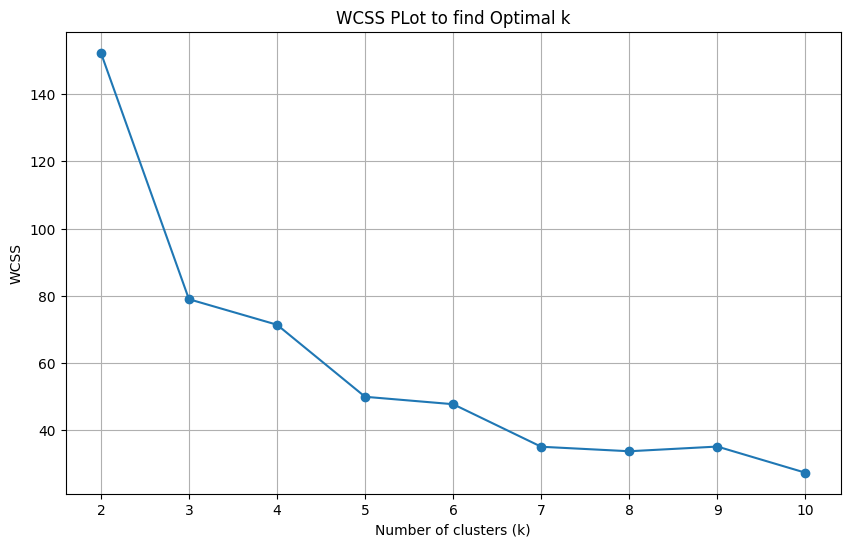

In [95]:
import matplotlib.pyplot as plt

def elbow_method(data: List[Datapoint], max_k: int):
    wcss_list = []
    for k in range(2, max_k+1):
        centroids, cluster_tags, _ = kmeans(data, k)
        WCSS = wcss(data, centroids, cluster_tags)
        wcss_list.append(WCSS)
        print(f"For k = {k}, WCSS = {WCSS:.2f}")
    
    # Plotting the elbow graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), wcss_list, marker='o')
    plt.title('WCSS PLot to find Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.xticks(range(2, max_k + 1))
    plt.grid()
    plt.show()
elbow_method(data, 10)

As we see, the highest decrease in WCSS occurs when we move from k = 2 to k = 3. And then WCSS decreases at a very low rate. <br>
**So k=3 is the optimal value by the elbow method.**

#### Seeing the crude output of K-Means Algorithm for optimal value k=3

In [97]:
data = load_data("iris/iris.data")
k = 3
centroids, cluster_tags, counts = kmeans(data, k)
for i in range(len(centroids)):
    print(f"The centroid of cluster {i} is {centroids[i]}")
    print(f"Number of datapoints = {counts[i]}")

The centroid of cluster 0 is Pt[5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999]
Number of datapoints = 50
The centroid of cluster 1 is Pt[5.88360655737705, 2.740983606557377, 4.388524590163935, 1.4344262295081966]
Number of datapoints = 61
The centroid of cluster 2 is Pt[6.853846153846153, 3.0769230769230766, 5.715384615384615, 2.053846153846153]
Number of datapoints = 39


## Step 5: Visualization of Clusters
- As we can see, we are printing the output in a very crude way.
- Let us visualise the cluster data as a 3D scatter plot.
- Since there are 4 attributes, we can pick 3 attributes out of 4 in 4C3 ways, i.e., 4 ways. So there will be 4 scatter plots. 

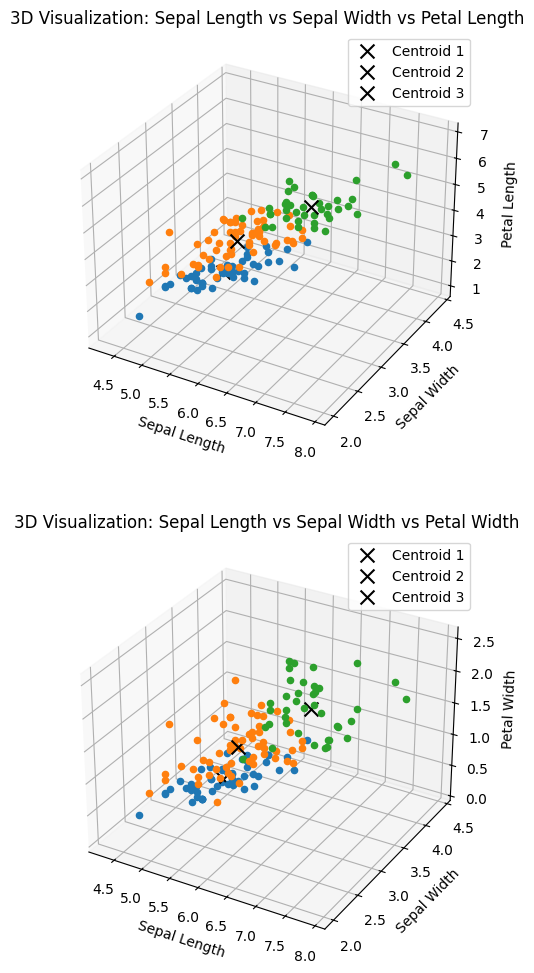

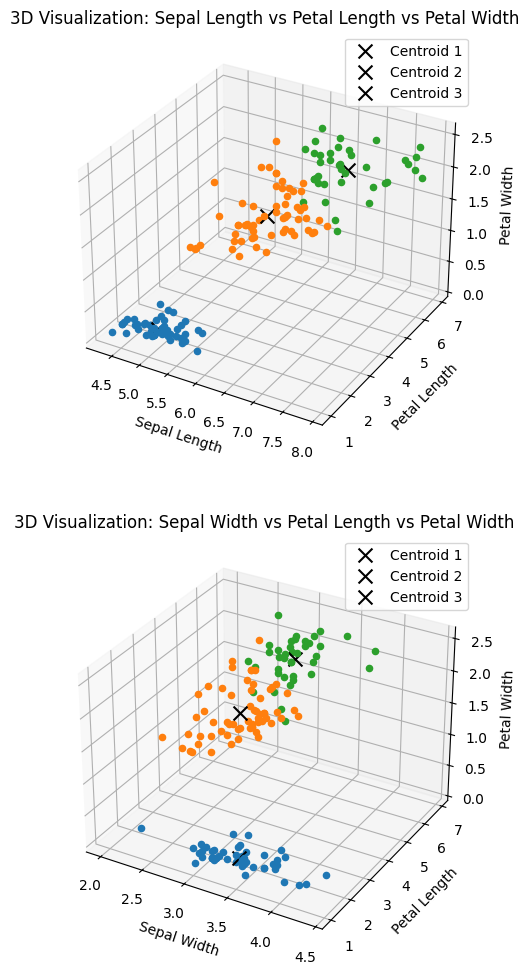

In [104]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def visualize(data: List[Datapoint], centroids: List[Datapoint], cluster_tags: List[int]):
    # Feature combinations with their indexes
    feature_combinations = [
        (0, 1, 2),  # Sepal Length, Sepal Width, Petal Length
        (0, 1, 3),  # Sepal Length, Sepal Width, Petal Width
        (0, 2, 3),  # and so on ...
        (1, 2, 3)   
    ]
    
    feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

    # First figure: 2 subplots
    fig1 = plt.figure(figsize=(8, 12))
    for index, (x_idx, y_idx, z_idx) in enumerate(feature_combinations[:2]):  # First 2 combinations
        ax = fig1.add_subplot(2, 1, index + 1, projection='3d')  # 2 row, 1 columns
        
        # Scatter plot for data points
        for i in range(len(data)):
            ax.scatter(data[i].dims[x_idx], data[i].dims[y_idx], data[i].dims[z_idx], 
                       c=f'C{cluster_tags[i]}', marker='o')
        
        # Scatter plot for centroids
        for i in range(len(centroids)):
            ax.scatter(centroids[i].dims[x_idx], centroids[i].dims[y_idx], centroids[i].dims[z_idx], 
                       c='k', marker='x', s=100, label=f'Centroid {i+1}')
        
        xlabel, ylabel, zlabel = feature_names[x_idx], feature_names[y_idx], feature_names[z_idx]
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel(zlabel)
        ax.set_title(f'3D Visualization: {xlabel} vs {ylabel} vs {zlabel}')
        ax.legend()
    plt.show()

    # Second figure: 2 subplots
    fig2 = plt.figure(figsize=(8, 12))
    for index, (x_idx, y_idx, z_idx) in enumerate(feature_combinations[2:]):  # Last 2 combinations
        ax = fig2.add_subplot(2, 1, index + 1, projection='3d')  # 2 row, 1 columns
        
        for i in range(len(data)):
            ax.scatter(data[i].dims[x_idx], data[i].dims[y_idx], data[i].dims[z_idx], 
                       c=f'C{cluster_tags[i]}', marker='o')
        
        for i in range(len(centroids)):
            ax.scatter(centroids[i].dims[x_idx], centroids[i].dims[y_idx], centroids[i].dims[z_idx], 
                       c='k', marker='x', s=100, label=f'Centroid {i+1}')
        
        xlabel, ylabel, zlabel = feature_names[x_idx], feature_names[y_idx], feature_names[z_idx]
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel(zlabel)
        ax.set_title(f'3D Visualization: {xlabel} vs {ylabel} vs {zlabel}')
        ax.legend()
    plt.show()

visualize(data, centroids, cluster_tags)

You can see the four different scatter plots based on different combinations chosen among the four attributes.

# DBSCAN Clustering Algorithm

## Step 1: Importing all the necessary packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2: Loading the dataset from csv file

In [2]:
iris_df = pd.read_csv('iris/iris.data')
iris_df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Step 3: Data Preprocessing
As we can see, we need to add column headers to define the feature names and remove the species columns from our dataset.

In [3]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv('iris/iris.data', header=None, names=columns)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Now we will remove the unnecessary column species

In [4]:
X = iris_df.drop(columns=['species'], errors='ignore')

We will now standardize our data.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# displaying the scaled data
pd.DataFrame(X_scaled, columns=X.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


As you can see, each feature is scaled so that its mean is `0` and its standard deviation is `1`.

## Step 4: Find Optimal value of ε(epsilon) 

In [6]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

Sort distances for plotting

In [7]:
distances = np.sort(distances[:, 3])

Plotting k-distance graph

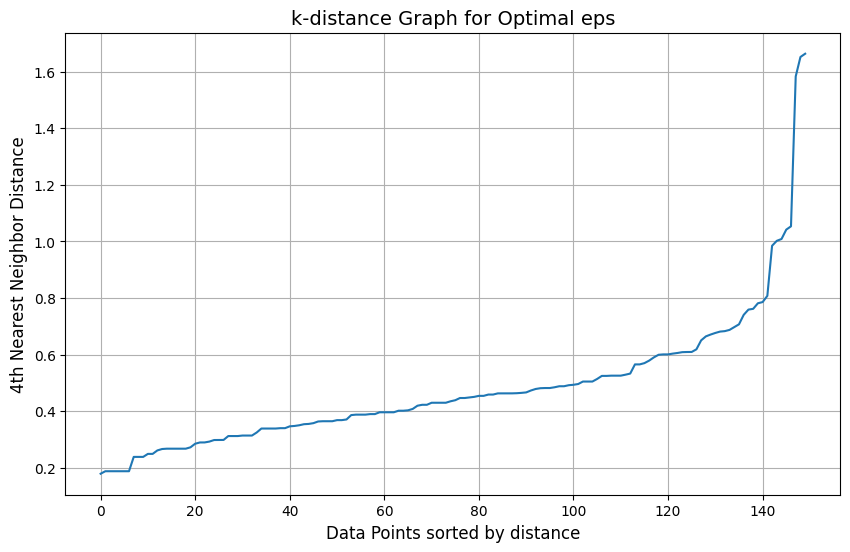

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=12)
plt.ylabel('4th Nearest Neighbor Distance', fontsize=12)
plt.title('k-distance Graph for Optimal eps', fontsize=14)
plt.grid(True)
plt.show()

As we can see, at `0.8`, there is a sharp increase. Hence choosing `epsilon=0.8` as the optimal value.  

## Step 4: Apply DBSCAN with the Optimal Epsilon
Taking **Epsilon**=0.8 and **min_pts**=5

In [12]:
optimal_eps = 0.8  

dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

iris_df['cluster'] = dbscan_labels

# Check the data with cluster labels
result_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster']]
result_df

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


- A new column called `cluster` has been added which contains the **cluster labels**(0, 1, 2, ...)
- Points labeled as `-1` are **noise points** or outliers.

## Step 5: Visualizing the Clusters in 2D
Since there are four features in the Iris dataset, we can create pairplots for each combination of features.

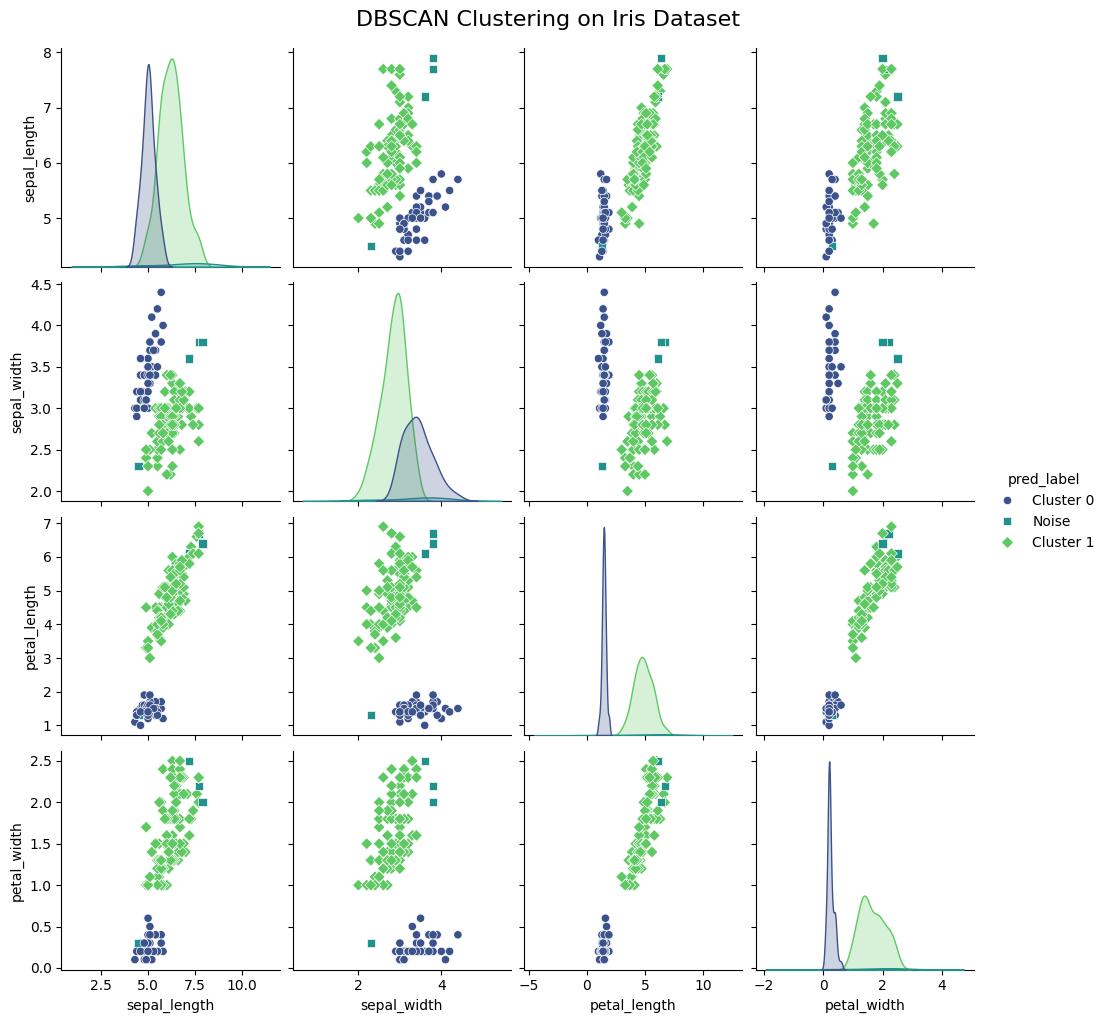

In [10]:
iris_df['pred_label'] = iris_df['cluster'].apply(lambda x: 'Noise' if x == -1 else f'Cluster {x}')
pairplot_data = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'pred_label']]
# Plot the pairplot for all features,color-coded by predicted label
sns.pairplot(pairplot_data, hue='pred_label', diag_kind="kde", palette="viridis", markers=["o", "s", "D"])

plt.suptitle('DBSCAN Clustering on Iris Dataset', y=1.02, fontsize=16)
plt.show()

## Step 6: Evaluating the clusters
We can check:
- How many points were assigned to each cluster.
- How many points were classified as noise (label -1).
- The total number of valid clusters.

In [11]:
cluster_counts = iris_df['pred_label'].value_counts()
print("Cluster Counts:")
print(cluster_counts.to_string(index=True))

# Count valid clusters (excluding noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

#Count noise points
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")

Cluster Counts:
pred_label
Cluster 1    97
Cluster 0    49
Noise         4
Number of clusters (excluding noise): 2
Number of noise points: 4


# Agglomerative Hierarchical Clustering Algorithm

## Step 1: Importing all the necessary packages

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Step 2: Loading the dataset from csv file

In [7]:
iris_df = pd.read_csv('iris/iris.data')
iris_df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Step 3: Data Preprocessing
As we can see, we need to add column headers to define the feature names and remove the species columns from our dataset.

In [8]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv('iris/iris.data', header=None, names=columns)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Now we will remove the unnecessary column species

In [9]:
X = iris_df.drop(columns=['species'], errors='ignore')

We will now standardize our data.

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# displaying the scaled data
pd.DataFrame(X_scaled, columns=X.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


As you can see, each feature is scaled so that its mean is 0 and its standard deviation is 1.

## Step 4: Perform Agglomerative Hierarchical Clustering
We will perform AHC using different linkage methods: single, complete, average, and ward.

In [15]:
linkage_methods = ['single', 'complete', 'average', 'ward']

# dictionary to hold the cluster labels for each method
clusters = {}

for method in linkage_methods:
    ahc = AgglomerativeClustering(n_clusters=3,linkage=method)
    clusters[method] = ahc.fit_predict(X_scaled)

#number of clusters formed for each method
for method, labels in clusters.items():
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"Number of clusters using {method} linkage: {n_clusters}")

Number of clusters using single linkage: 3
Number of clusters using complete linkage: 3
Number of clusters using average linkage: 3
Number of clusters using ward linkage: 3


## Step 5: Visualize Dendrograms

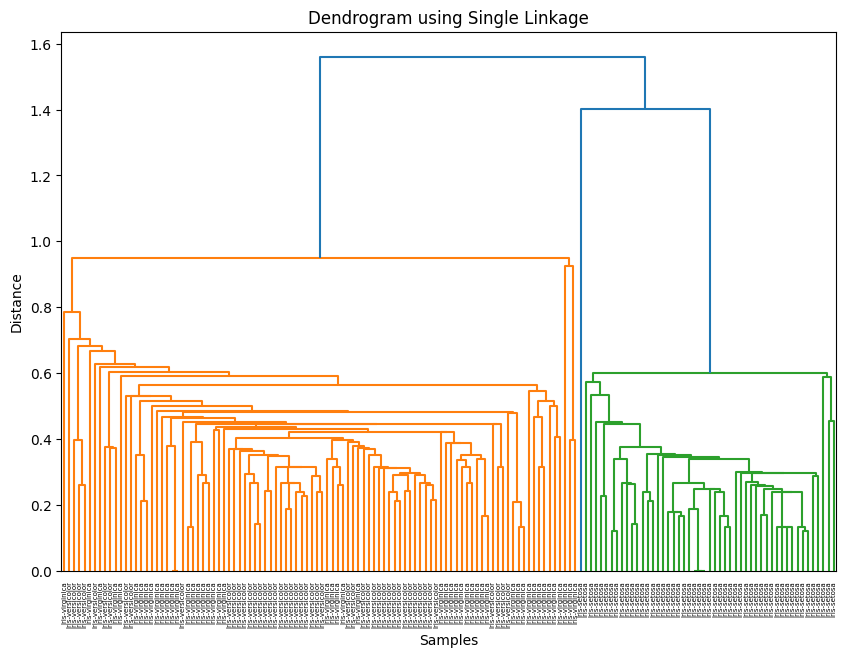

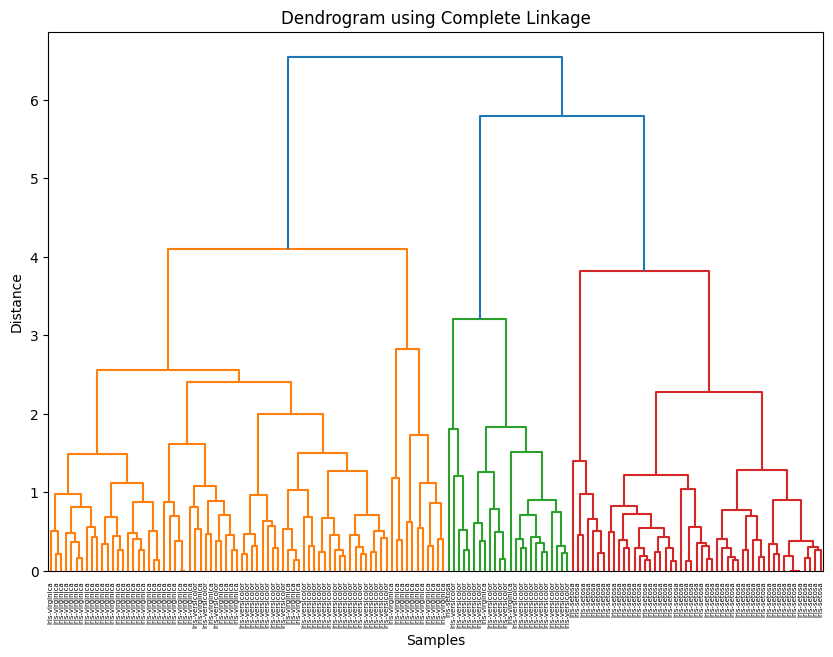

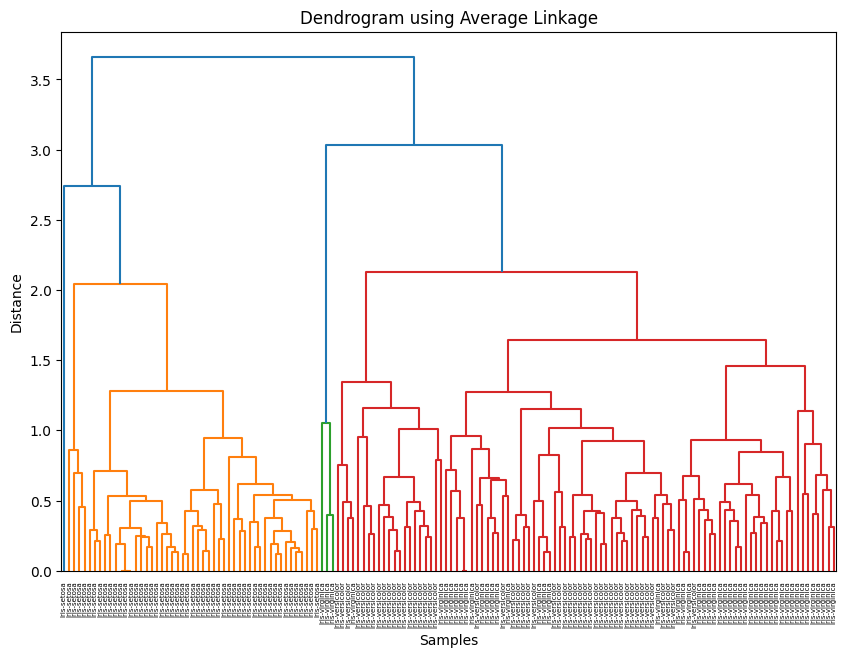

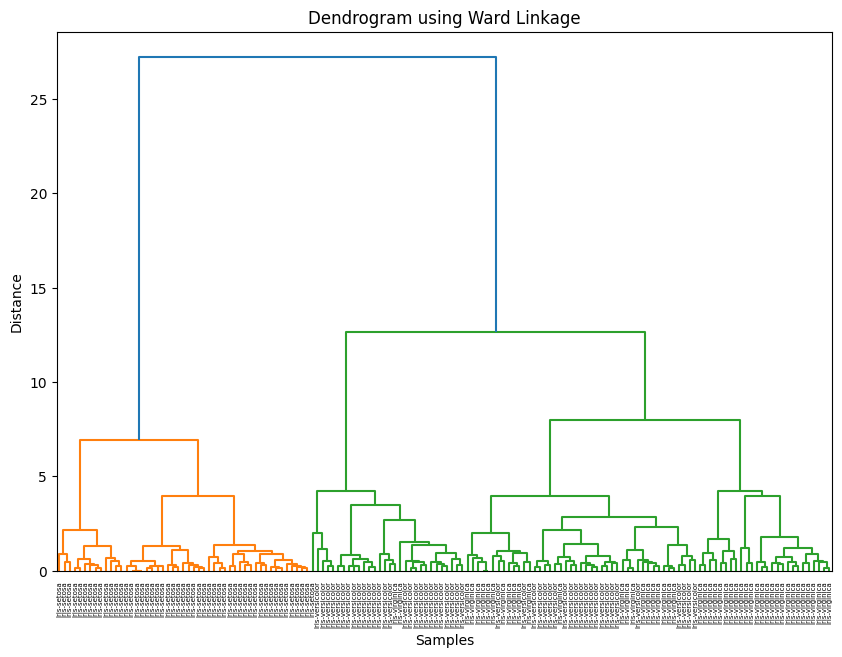

In [16]:
def plot_dendrogram(method):
    # Create linkage matrix
    Z = linkage(X_scaled, method=method)
    
    # Create a dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z, labels=iris_df['species'].values)
    plt.title(f'Dendrogram using {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

#dendrograms for each linkage method
for method in linkage_methods:
    plot_dendrogram(method)

## Step 6: Evaluating the Results

In [19]:
for method in linkage_methods:
    iris_df[f'cluster_{method}'] = clusters[method]
    print(f"\nCluster assignments using {method.capitalize()} linkage:")
    print(iris_df[f'cluster_{method}'].value_counts().to_string(index=True))


Cluster assignments using Single linkage:
cluster_single
0    100
2     49
1      1

Cluster assignments using Complete linkage:
cluster_complete
0    77
1    49
2    24

Cluster assignments using Average linkage:
cluster_average
1    97
0    50
2     3

Cluster assignments using Ward linkage:
cluster_ward
0    71
1    49
2    30
